# Vacunacions

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

/Users/arnauquindos/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data prep

In [121]:
# Load data
url = "https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip"
resp = urlopen(url)
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_csv(zipfile.open(zipfile.namelist()[0]), sep=";")

# Column transformation and select
df["DATA"] = df.DATA.astype('datetime64[ns]')
df = df[df.DATA>datetime(2020, 12, 20)]
df = df.sort_values("DATA")

# New columns
df["DOSIS_TOTALS"] = df.VACUNATS_DOSI_1+df.VACUNATS_DOSI_2
df["cum1"] = df.VACUNATS_DOSI_1.cumsum()
df["cum2"] = df.VACUNATS_DOSI_2.cumsum()
df["cum"] = df.DOSIS_TOTALS.cumsum()
df["firstDayWeek"] = df.DATA - df.DATA.dt.weekday * timedelta(days=1)

In [122]:
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2,DOSIS_TOTALS,cum1,cum2,cum,firstDayWeek
1142,CATALUNYA,GLOBAL,2020-12-21,Home,Menors de 15,170,1943,1048,1,0,...,71,1903,1037,0,0,0,0,0,0,2020-12-21
1134,CATALUNYA,GLOBAL,2020-12-21,Altres,NaN,60,1073,23,4,0,...,0,1051,23,0,0,0,0,0,0,2020-12-21
1135,CATALUNYA,GLOBAL,2020-12-21,Dona,Entre 15 i 64,1111,9910,8413,26,4,...,677,9045,7868,0,0,0,0,0,0,2020-12-21
1136,CATALUNYA,GLOBAL,2020-12-21,Dona,Entre 65 i 74,98,685,961,9,4,...,69,630,865,0,0,0,0,0,0,2020-12-21
1141,CATALUNYA,GLOBAL,2020-12-21,Home,Majors de 74,119,1111,1696,31,3,...,73,999,1374,0,0,0,0,0,0,2020-12-21


## Daily

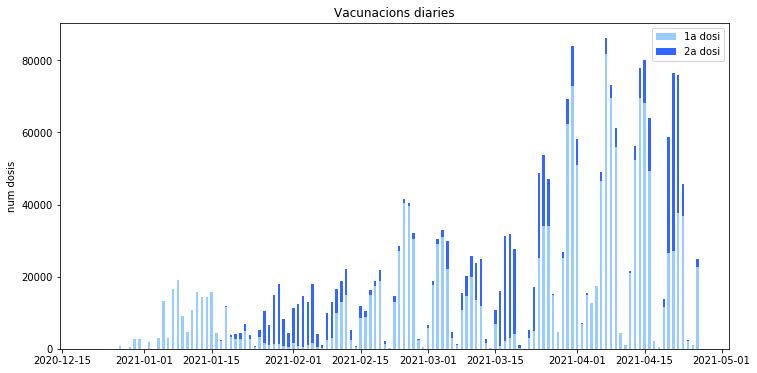

In [123]:
vac_cols = ["VACUNATS_DOSI_1", "VACUNATS_DOSI_2"]
vd = df.groupby("DATA", as_index=False)[vac_cols].sum()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_1, width=0.5, color = [(0.6, 0.8, 1)], label='1a dosi')
p2 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_2, width=0.5, bottom=vd.VACUNATS_DOSI_1, color=[(0.2, 0.4, 1)], label='2a dosi')
ax.set_title("Vacunacions diaries")
ax.set_ylabel("num dosis")
ax.legend()
plt.show()

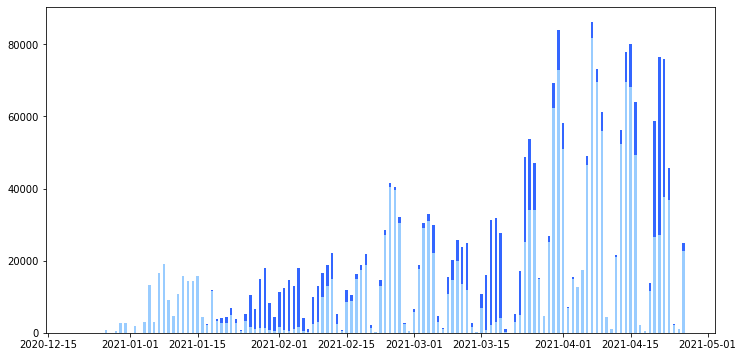

In [124]:
vac_cols = ["VACUNATS_DOSI_1", "VACUNATS_DOSI_2"]
vd = df.groupby("DATA", as_index=False)[vac_cols].sum()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_1, width=0.5, color = [(0.6, 0.8, 1)])
p2 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_2, width=0.5, bottom=vd.VACUNATS_DOSI_1, color=[(0.2, 0.4, 1)])

## Weekly

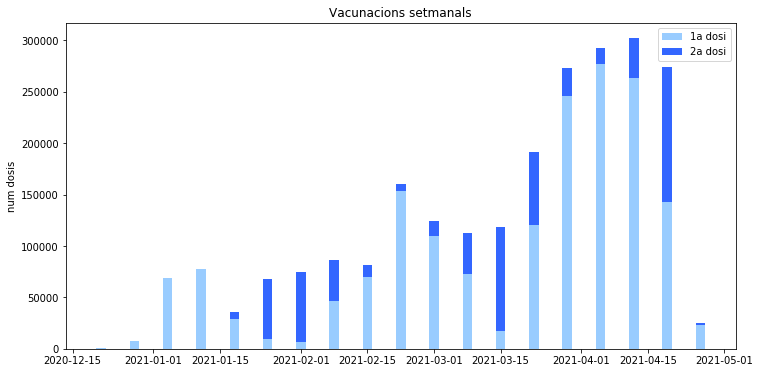

In [125]:
vac_cols = ["VACUNATS_DOSI_1", "VACUNATS_DOSI_2", "DOSIS_TOTALS"]
vw = df.groupby("firstDayWeek", as_index=False)[vac_cols].sum()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vw.firstDayWeek, vw.VACUNATS_DOSI_1, width=2, color = [(0.6, 0.8, 1)], label='1a dosi')
p2 = ax.bar(vw.firstDayWeek, vw.VACUNATS_DOSI_2, width=2, bottom=vw.VACUNATS_DOSI_1, color = [(0.2, 0.4, 1)], label='2a dosi')
ax.set_title("Vacunacions setmanals")
ax.set_ylabel("num dosis")
ax.legend()
plt.show()

In [126]:
last3

289695.3333333333

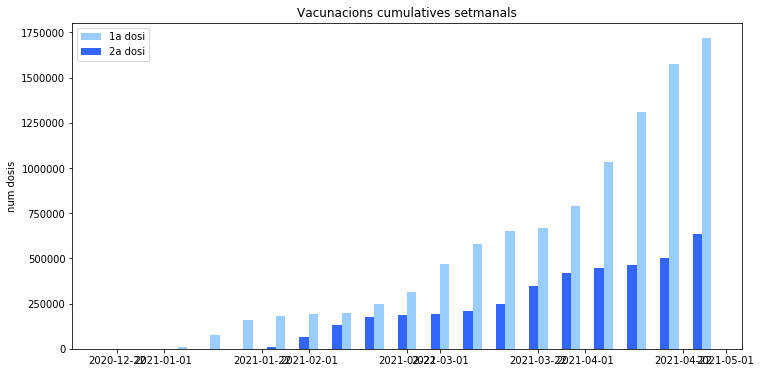

In [127]:
cum_cols = ["cum1", "cum2"]
vcw = df.groupby("firstDayWeek", as_index=False)[cum_cols].first()
fig, ax = plt.subplots(figsize=(12,6))
w = 2
p1 = ax.bar(vcw.firstDayWeek+timedelta(days=w/2), vcw.cum1, width=w, color = [(0.6, 0.8, 1)], align='center', label='1a dosi')
p2 = ax.bar(vcw.firstDayWeek-timedelta(days=w/2), vcw.cum2, width=w, color = [(0.2, 0.4, 1)], align='center', label='2a dosi')
ax.set_title("Vacunacions cumulatives setmanals")
ax.set_ylabel("num dosis")
ax.legend()
plt.show()

# Weekly total dosis

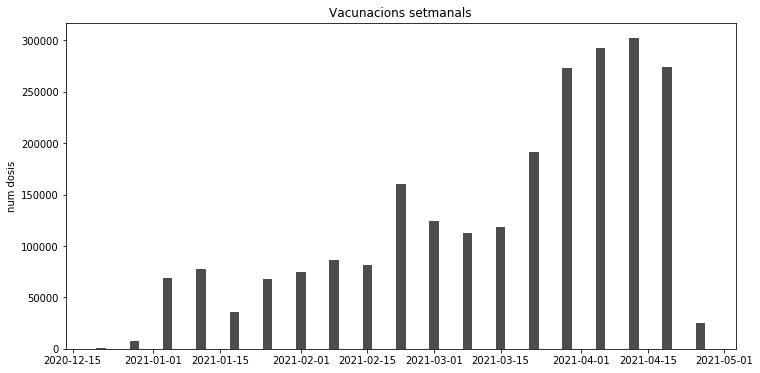

In [132]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(vw.firstDayWeek, vw.DOSIS_TOTALS, width=2, color = [(0.3, 0.3, 0.3)])
ax.set_title("Vacunacions setmanals")
ax.set_ylabel("num dosis")
plt.show()

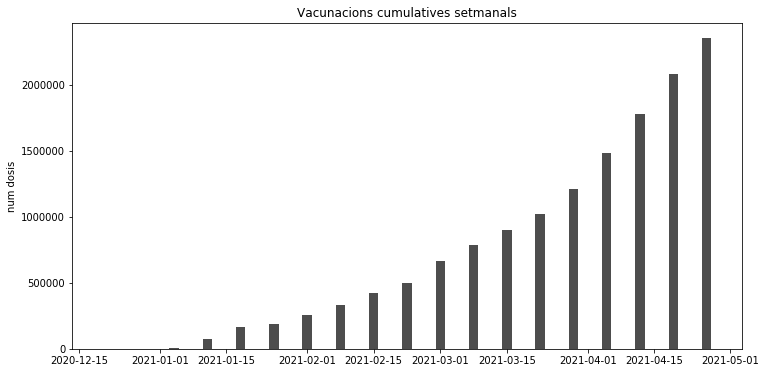

In [204]:
vct = df.groupby("firstDayWeek", as_index=False)["cum"].first()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vct.firstDayWeek, vct.cum, width=w, color = [(0.3, 0.3, 0.3)], align='center')
ax.set_title("Vacunacions cumulatives setmanals")
ax.set_ylabel("num dosis")
plt.show()

In [317]:
(vw.firstDayWeek + pd.Timedelta(36, unit='w')).to_frame()

,firstDayWeek
0,2021-08-30
1,2021-09-06
2,2021-09-13
3,2021-09-20
4,2021-09-27
5,2021-10-04
6,2021-10-11
7,2021-10-18
8,2021-10-25
9,2021-11-01


/Users/arnauquindos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


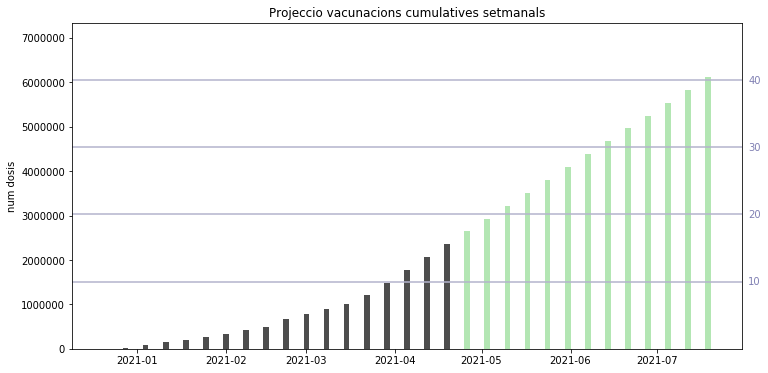

In [321]:
# create a future date df
ftr =  (vw.firstDayWeek + pd.Timedelta(12, unit='w')).to_frame()
ftr['DOSIS_TOTALS'] = round(vw.DOSIS_TOTALS.tail(4).head(3).mean())
ftr = ftr[ftr.firstDayWeek>=vw.firstDayWeek.max()]
ftr["future"] = 1

real = vw[:-1]
real["future"] = 0
# join the future data
df_ftr = pd.concat([real, ftr], ignore_index=True)[["firstDayWeek","DOSIS_TOTALS", "future"]]
df_ftr["cum"] = df_ftr.DOSIS_TOTALS.cumsum()

import matplotlib.transforms as transforms
TOTAL_POB = 7560000
fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim([0, 1.20*df_ftr.cum.max()])
p1 = ax.bar(df_ftr[df_ftr.future==0].firstDayWeek, df_ftr[df_ftr.future==0].cum, 
            width=w, color = [(0.3, 0.3, 0.3)], align='center')
p2 = ax.bar(df_ftr[df_ftr.future==1].firstDayWeek, df_ftr[df_ftr.future==1].cum, 
            width=w, color = [(0.7, 0.9, 0.7)], align='center')
for k in [10,20,30,40]:
    pob_k = 0.02*TOTAL_POB*k
    ax.axhline(y=pob_k, color=(0.7, 0.7, 0.8))
    trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(1.01,pob_k/ax.get_ylim()[1], "{:.0f}".format(k), color=(0.5, 0.5, 0.7), transform=ax.transAxes, 
        ha="left", va="center")
ax.set_title("Projeccio vacunacions cumulatives setmanals")
ax.set_ylabel("num dosis")
plt.show()

In [323]:
df_ftr

,firstDayWeek,DOSIS_TOTALS,future,cum
0,2020-12-21,804,0,804
1,2020-12-28,7642,0,8446
2,2021-01-04,68569,0,77015
3,2021-01-11,77618,0,154633
4,2021-01-18,35729,0,190362
5,2021-01-25,67901,0,258263
6,2021-02-01,74365,0,332628
7,2021-02-08,86177,0,418805
8,2021-02-15,81881,0,500686
9,2021-02-22,160458,0,661144
